In [ ]:
import numpy as np
import pandas as pd


from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats
from sklearn.linear_model import Lasso

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [ ]:
# Load the CSV file
data_df = pd.read_csv("Filtered_Resultados_Saber_11.csv", sep=',')

# Display the first few rows of the dataframe
data_df.head()


,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,COLE_AREA_UBICACION,COLE_DEPTO_UBICACION,COLE_CALENDARIO
0,No,No,No,No,NaN,URBANO,META,A
1,Si,Si,Si,Si,332.0,URBANO,META,A
2,No,Si,Si,Si,257.0,URBANO,META,A
3,No,Si,No,Si,251.0,URBANO,META,A
4,No,Si,No,Si,251.0,URBANO,META,A


## Tarea 2: Limpieza y alistamiento de datos

>2.1 Dimensión de Columnas y filas

>2.2 Verificación de tipos

>2.3 Columnas a Features

>2.4 Análisis de completitud

>2.5 Eliminación Variables no Deseadas

>2.6 Imputación variable wip

>2.7 Transformación Variables Categoricas a Dummies

>2.8 Mirando nuevamente las correlaciones

### 2.1 Dimensión de Columnas y filas

In [ ]:
#Columnas y Filas
data_df.shape

(146006, 8)

### 2.2 Verificacion de tipos

In [76]:
#Verificación de tipos
data_df.dtypes


FAMI_TIENEAUTOMOVIL     category
FAMI_TIENECOMPUTADOR    category
FAMI_TIENEINTERNET      category
FAMI_TIENELAVADORA      category
PUNT_GLOBAL              float64
COLE_AREA_UBICACION     category
COLE_DEPTO_UBICACION    category
COLE_CALENDARIO         category
dtype: object

In [77]:
# Convertir las columnas categóricas de tipo 'object' a 'category'
categorical_columns = [
    'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 
    'FAMI_TIENELAVADORA', 'COLE_AREA_UBICACION', 'COLE_DEPTO_UBICACION', 
    'COLE_CALENDARIO'
]

for column in categorical_columns:
    data_df[column] = data_df[column].astype('category')

### 2.3 Columnas

In [64]:
#Columnas
data_df.columns
categorical_features = ["FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR", "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", "COLE_AREA_UBICACION", "COLE_DEPTO_UBICACION", "COLE_CALENDARIO"]

### 2.4 Análisis de completitud

Análisis de completitud:A continuación, se revisa la completitud de los datos proporcionados. Es por eso que, se hace una revisión del porcentaje de valores nulos (vacíos) en las características seleccionadas para la regresión.

In [ ]:
#Análisis de completitud
(data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending = False)
#PROBLEMA: Completitud

PUNT_GLOBAL             0.340828
FAMI_TIENEINTERNET      0.024615
FAMI_TIENECOMPUTADOR    0.017931
FAMI_TIENEAUTOMOVIL     0.016273
FAMI_TIENELAVADORA      0.015629
COLE_AREA_UBICACION     0.000000
COLE_DEPTO_UBICACION    0.000000
COLE_CALENDARIO         0.000000
dtype: float64

### 2.5 Imputacion variable objetivo

In [44]:
##Opcion 1
# Crear una copia del DataFrame original para trabajar sobre ella
data_df_clean = data_df.copy()
# Imputación de 'PUNT_GLOBAL' con la media en el nuevo DataFrame
data_df_clean['PUNT_GLOBAL'] = data_df_clean['PUNT_GLOBAL'].fillna(data_df_clean['PUNT_GLOBAL'].mean())

##Opcion 2
# Crear una copia del DataFrame original
data_df_clean2 = data_df.copy()
# Eliminar filas donde 'PUNT_GLOBAL' es NaN
data_df_clean2 = data_df_clean2.dropna(subset=['PUNT_GLOBAL'])

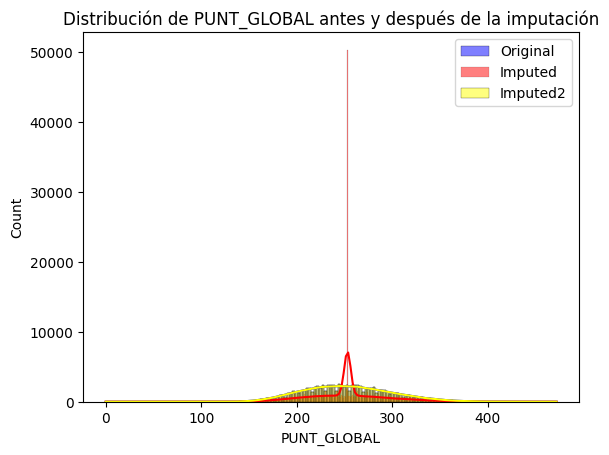

In [45]:
# Distribución de 'PUNT_GLOBAL' antes de la imputación
sns.histplot(data_df['PUNT_GLOBAL'].dropna(), kde=True, color='blue', label='Original')
# Distribución después de la imputación tecnica 1
sns.histplot(data_df_clean['PUNT_GLOBAL'], kde=True, color='red', label='Imputed')
# Distribución después de la imputación tecnica 2
sns.histplot(data_df_clean2['PUNT_GLOBAL'], kde=True, color='yellow', label='Imputed2')
plt.legend()
plt.title('Distribución de PUNT_GLOBAL antes y después de la imputación')
plt.show()

In [49]:
# Comparar estadísticas descriptivas
original_stats = data_df['PUNT_GLOBAL'].describe()
imputed_stats = data_df_clean['PUNT_GLOBAL'].describe()
imputed_stats2 = data_df_clean2['PUNT_GLOBAL'].describe()

print("Estadísticas originales:\n", original_stats)
print("Estadísticas después de la imputación 1:\n", imputed_stats)
print("Estadísticas después de la imputación 2:\n", imputed_stats2)

Estadísticas originales:
 count    96243.000000
mean       253.071631
std         45.997101
min          0.000000
25%        220.000000
50%        251.000000
75%        284.000000
max        472.000000
Name: PUNT_GLOBAL, dtype: float64
Estadísticas después de la imputación 1:
 count    96243.000000
mean       253.071631
std         45.997101
min          0.000000
25%        220.000000
50%        251.000000
75%        284.000000
max        472.000000
Name: PUNT_GLOBAL, dtype: float64
Estadísticas después de la imputación 2:
 count    96243.000000
mean       253.071631
std         45.997101
min          0.000000
25%        220.000000
50%        251.000000
75%        284.000000
max        472.000000
Name: PUNT_GLOBAL, dtype: float64


### 2.5 Imputacion variables categoricas

In [58]:
##Metodo 1
# Crear una copia del DataFrame original para trabajar sobre ella
data_df_clean = data_df.copy()
# Imputación para variables categóricas con la moda en el nuevo DataFrame
categorical_columns = ['FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA']
for column in categorical_columns:
    mode_value = data_df_clean[column].mode()[0]
    data_df_clean[column] = data_df_clean[column].fillna(mode_value)

##Metodo 2
data_df_numeric = data_df.copy()
# Convertir categorías a códigos numéricos
for column in categorical_columns:
    data_df_numeric[column] = pd.factorize(data_df_numeric[column])[0]
# Aplicar KNN Imputer
imputer_knn = KNNImputer(n_neighbors=5)
data_df_numeric[categorical_columns] = imputer_knn.fit_transform(data_df_numeric[categorical_columns])
# Convertir de nuevo los códigos numéricos a categorías
# Asumiendo que has guardado las categorías originales si necesitas revertir exactamente
for column in categorical_columns:
    unique_categories = data_df[column].dropna().unique()
    data_df_numeric[column] = pd.Categorical.from_codes(data_df_numeric[column].round().astype(int), categories=unique_categories)

## Metodo 3

# Suponiendo que data_df es tu DataFrame original
data_df_delete = data_df.copy()
# Lista de columnas categóricas de interés
categorical_columns = ['FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA']
# Eliminar filas donde cualquiera de estas columnas categóricas tiene un valor nulo
data_df_cleaned = data_df_delete.dropna(subset=categorical_columns)
# Verificar el nuevo tamaño del DataFrame para evaluar cuántos registros se han eliminado
print(f"Original size: {data_df_delete.shape[0]}, New size after dropping nulls: {data_df_cleaned.shape[0]}")

Original size: 146006, New size after dropping nulls: 140938


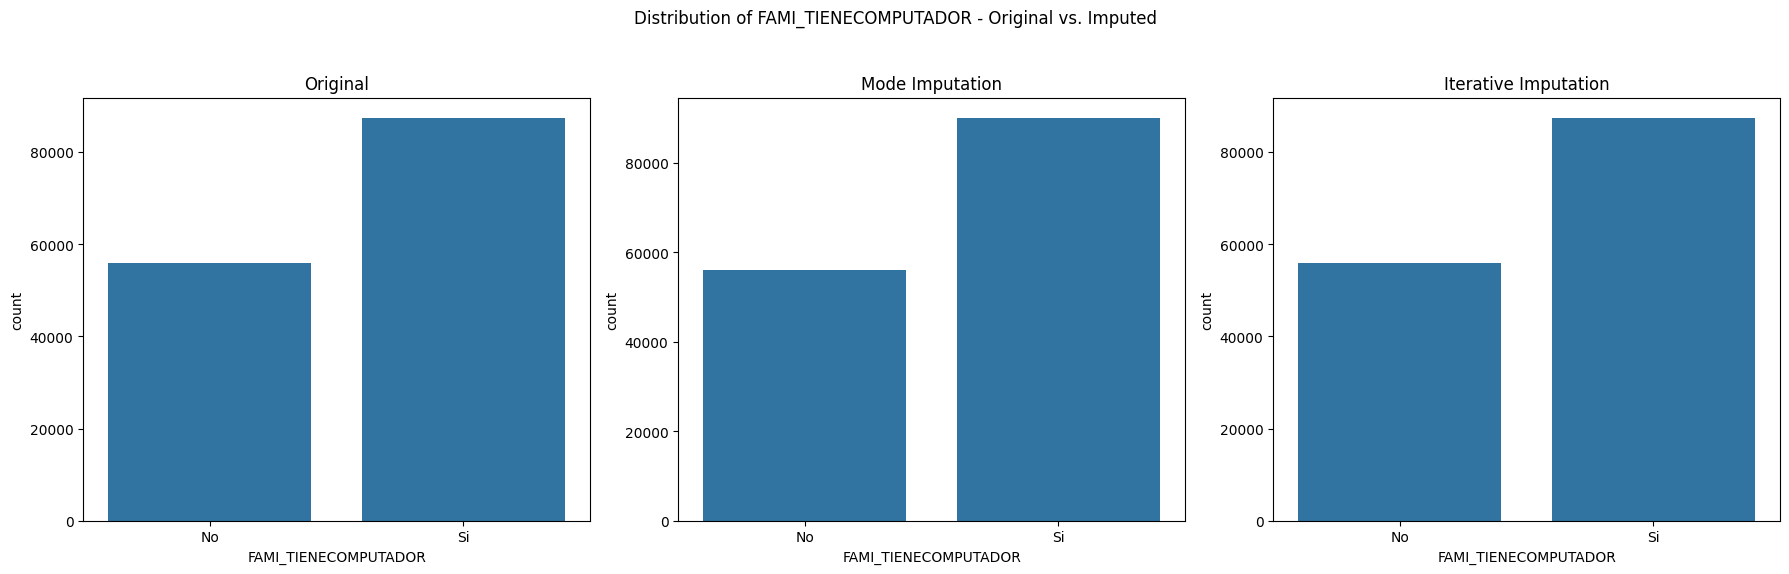

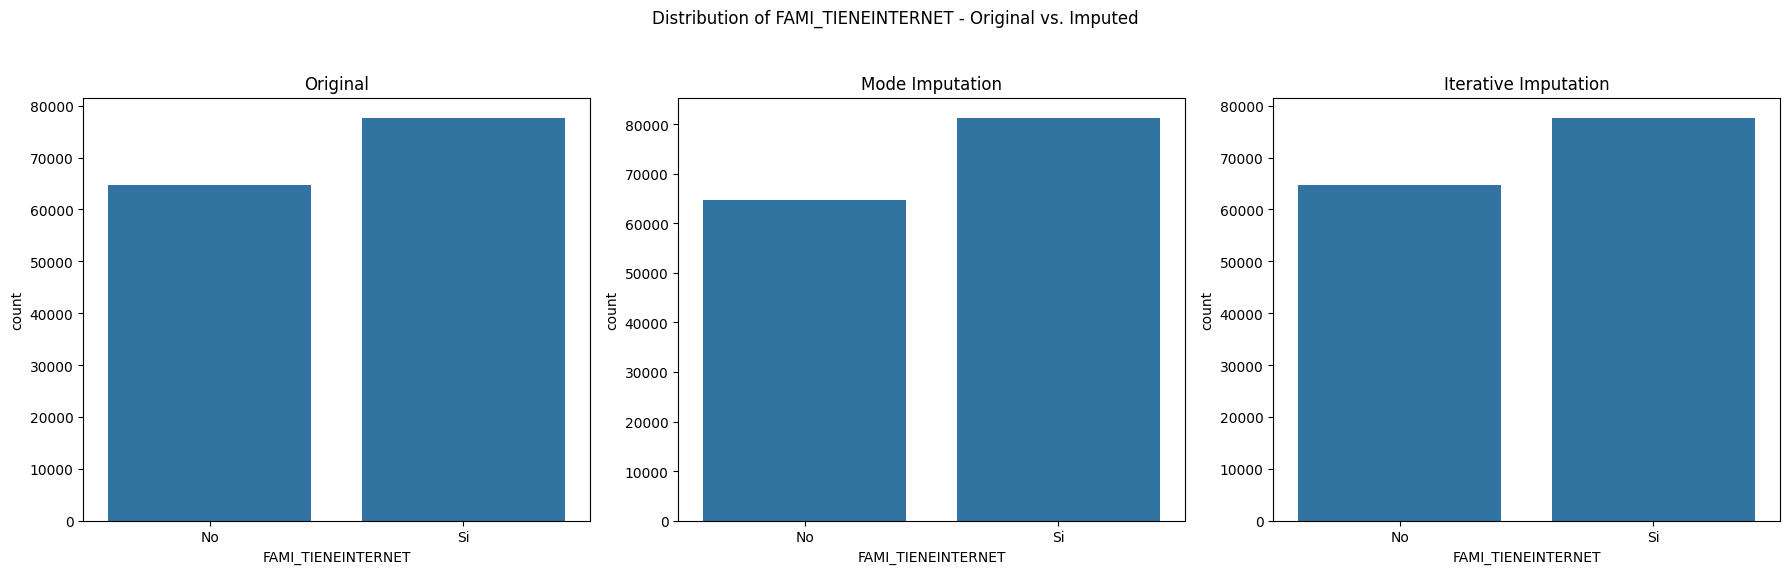

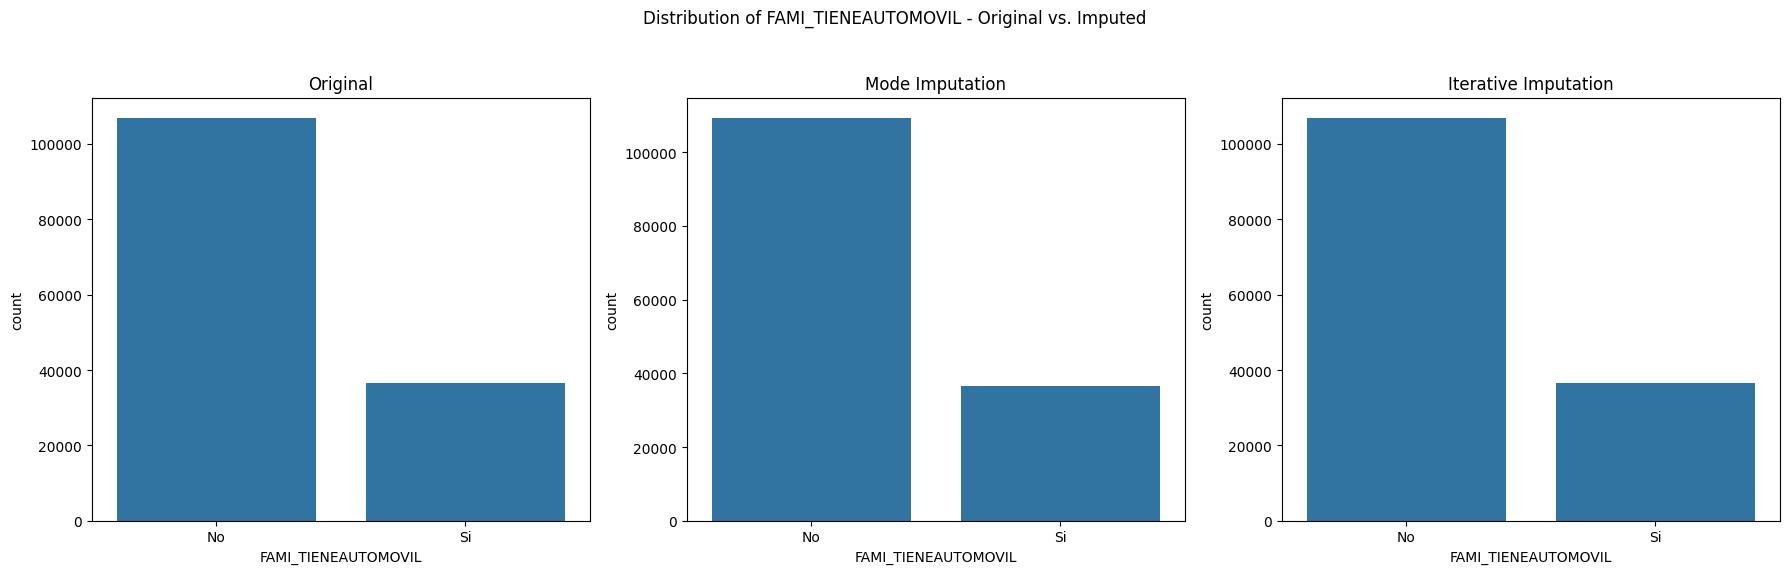

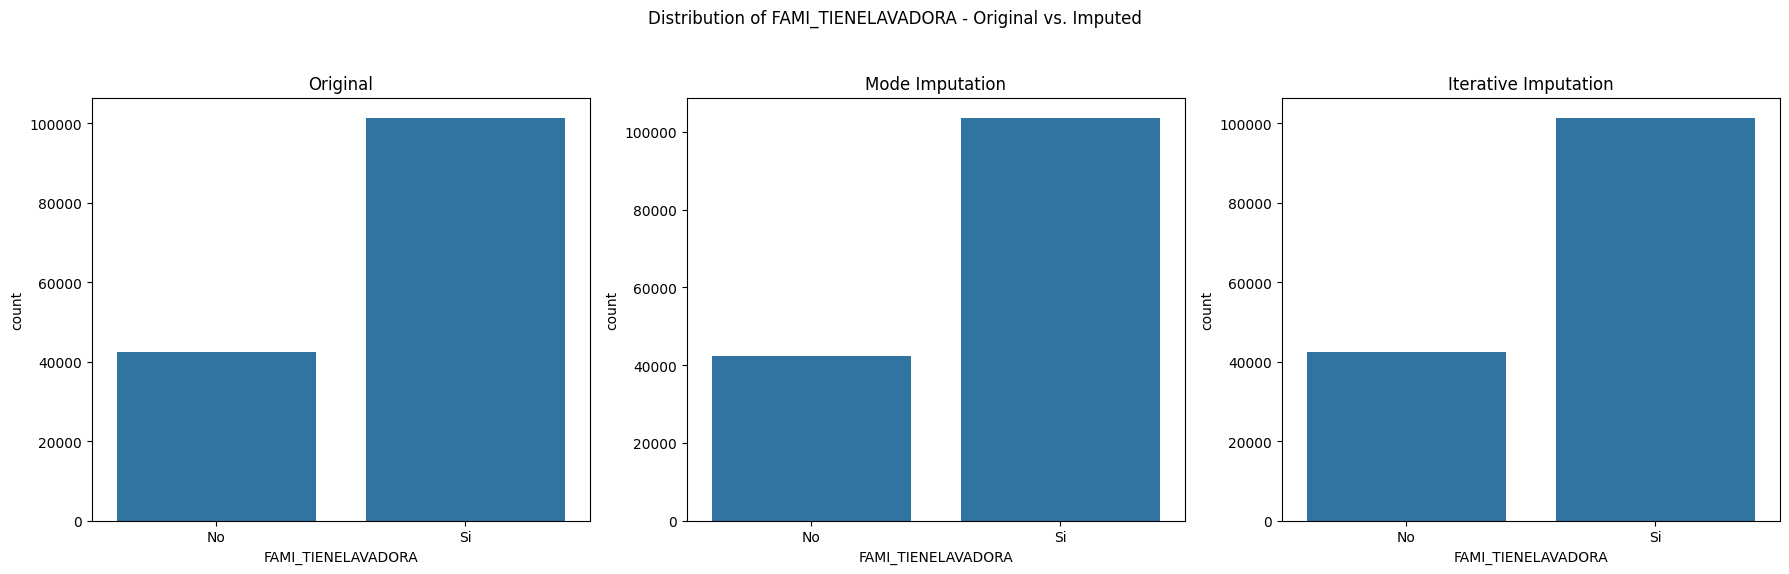

In [53]:
# Definir las columnas categóricas
categorical_columns = ['FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA']

# Iterar a través de cada columna categórica y generar gráficos
for column in categorical_columns:
    plt.figure(figsize=(18, 6))  # Ajusta el tamaño del gráfico para mejor visualización

    # Gráfico para la distribución original
    plt.subplot(1, 3, 1)
    sns.countplot(x=column, data=data_df, order=data_df[column].dropna().unique())
    plt.title('Original')

    # Gráfico después de la imputación por la moda
    plt.subplot(1, 3, 2)
    sns.countplot(x=column, data=data_df_clean, order=data_df_clean[column].dropna().unique())
    plt.title('Mode Imputation')

    # Gráfico después de la imputación iterativa
    plt.subplot(1, 3, 3)
    sns.countplot(x=column, data=data_df_numeric, order=data_df_numeric[column].dropna().unique())
    plt.title('Iterative Imputation')

    plt.suptitle(f'Distribution of {column} - Original vs. Imputed')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste del layout para suptitle
    plt.show()

In [54]:
from scipy.stats import chi2_contingency
import pandas as pd

# Función para calcular la prueba de chi-cuadrado entre dos series
def perform_chi2_test(original, imputed, category):
    # Crear tablas de contingencia
    contingency_table = pd.crosstab(original[category], imputed[category])
    
    # Realizar la prueba de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Prueba de Chi-Cuadrado para {category}:")
    print(f"Chi2 statistic: {chi2}, p-value: {p}\n")

# Asumiendo que 'original' es tu DataFrame sin imputaciones
# Ejecutar la prueba para cada variable categórica
for column in categorical_columns:
    print(f"Evaluando la variable {column}:\n")
    
    # Comparar original con imputación por moda
    perform_chi2_test(data_df, data_df_clean, column)
    
    # Comparar original con imputación KNN
    perform_chi2_test(data_df, data_df_numeric, column)

Evaluando la variable FAMI_TIENECOMPUTADOR:

Prueba de Chi-Cuadrado para FAMI_TIENECOMPUTADOR:
Chi2 statistic: 143383.79854880867, p-value: 0.0

Prueba de Chi-Cuadrado para FAMI_TIENECOMPUTADOR:
Chi2 statistic: 143383.79854880867, p-value: 0.0

Evaluando la variable FAMI_TIENEINTERNET:

Prueba de Chi-Cuadrado para FAMI_TIENEINTERNET:
Chi2 statistic: 142407.966791445, p-value: 0.0

Prueba de Chi-Cuadrado para FAMI_TIENEINTERNET:
Chi2 statistic: 142407.966791445, p-value: 0.0

Evaluando la variable FAMI_TIENEAUTOMOVIL:

Prueba de Chi-Cuadrado para FAMI_TIENEAUTOMOVIL:
Chi2 statistic: 143624.74066670646, p-value: 0.0

Prueba de Chi-Cuadrado para FAMI_TIENEAUTOMOVIL:
Chi2 statistic: 143624.74066670646, p-value: 0.0

Evaluando la variable FAMI_TIENELAVADORA:

Prueba de Chi-Cuadrado para FAMI_TIENELAVADORA:
Chi2 statistic: 143719.18889197425, p-value: 0.0

Prueba de Chi-Cuadrado para FAMI_TIENELAVADORA:
Chi2 statistic: 143719.18889197425, p-value: 0.0



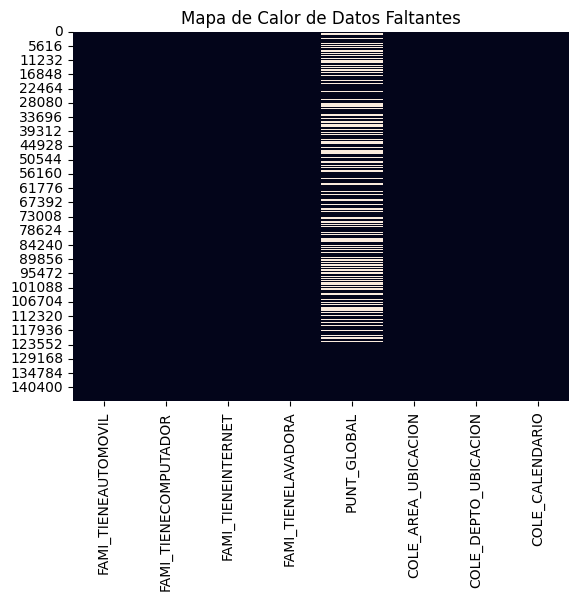

In [59]:
sns.heatmap(data_df_clean.isnull(), cbar=False)
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

In [19]:
# Calcular el promedio de 'wip' para cada día
average_wip_by_day = data_df.groupby('day')['wip'].transform('mean')

# Imputar los valores faltantes en 'wip' con los promedios correspondientes
data_df['wip'].fillna(average_wip_by_day, inplace=True)
data_df['wip'].isnull().sum()

0

In [60]:
data_df_clean

,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,COLE_AREA_UBICACION,COLE_DEPTO_UBICACION,COLE_CALENDARIO
0,No,No,No,No,NaN,URBANO,META,A
1,Si,Si,Si,Si,332.0,URBANO,META,A
2,No,Si,Si,Si,257.0,URBANO,META,A
3,No,Si,No,Si,251.0,URBANO,META,A
4,No,Si,No,Si,251.0,URBANO,META,A
...,...,...,...,...,...,...,...,...
146001,No,No,No,No,222.0,URBANO,META,A
146002,No,No,Si,No,245.0,URBANO,META,A
146003,No,No,No,Si,209.0,URBANO,META,A
146004,No,No,No,No,206.0,URBANO,META,A


### 2.7 Transformación Variables Dumies

In [80]:
#Variables Dummies
# Copiar el DataFrame original data_df
data_df_modeling = data_df.copy()

# Obtener variables categóricas
variables_categoricas =  ["FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR", "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", "COLE_AREA_UBICACION", "COLE_DEPTO_UBICACION", "COLE_CALENDARIO"]

# Convertir variables categóricas en variables dummy y agregarlas al DataFrame copiado
for variable in variables_categoricas:
    dummies = pd.get_dummies(data_df_modeling[variable], prefix=variable, drop_first=True)
    data_df_modeling = pd.concat([data_df_modeling, dummies], axis=1)
    data_df_modeling.drop(variable, axis=1, inplace=True)

# Ver las primeras filas del DataFrame copiado con las variables dummy
data_df_modeling.head()

,PUNT_GLOBAL,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si,COLE_AREA_UBICACION_URBANO
0,NaN,False,False,False,False,True
1,332.0,True,True,True,True,True
2,257.0,False,True,True,True,True
3,251.0,False,True,False,True,True
4,251.0,False,True,False,True,True


### 2.8 Mirando nuevamente las correlaciones

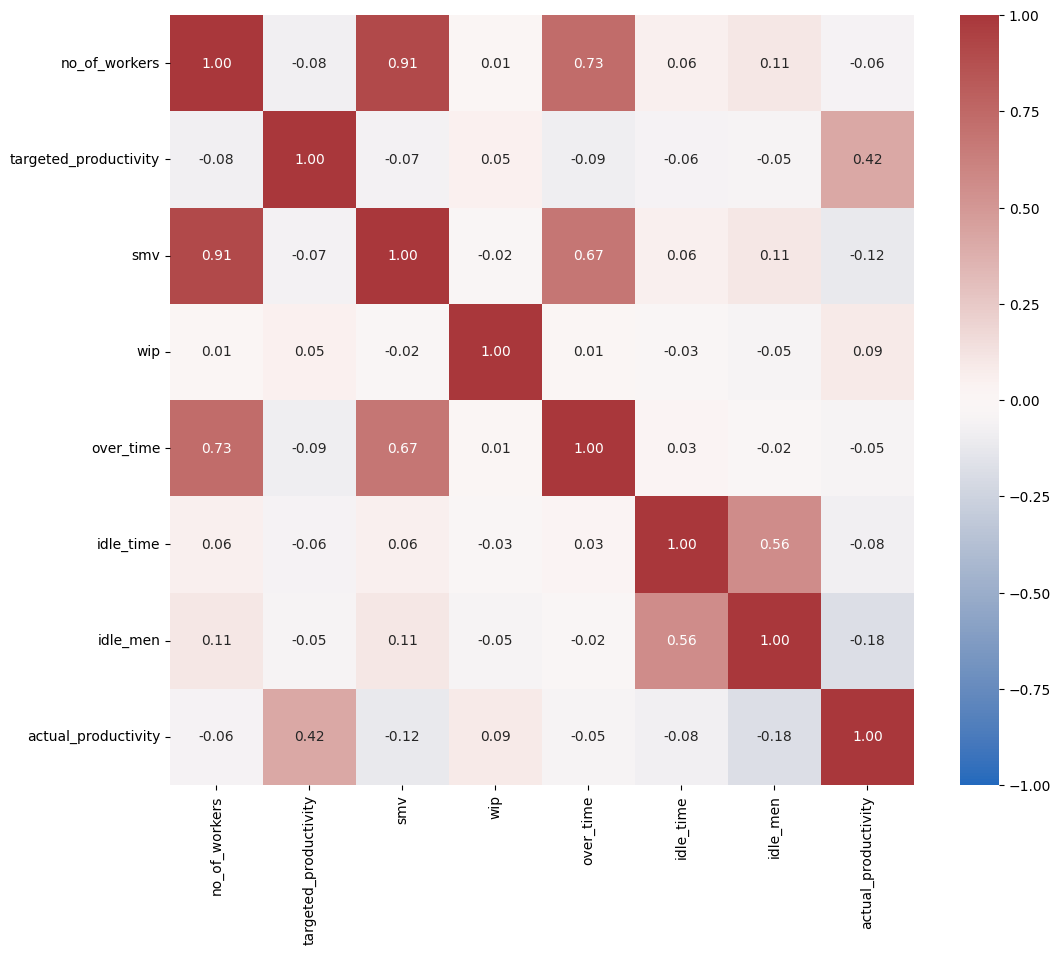

In [23]:
features_numericas= ['no_of_workers', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_time', 'idle_men', 'actual_productivity']
correlation_matrix = data_df_modeling[features_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

## 2.9 Archivo Resultante

In [78]:
data_df.to_csv('clean_data.txt')